In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

import sys
sys.path.append('../../')

from pragmaticml import confusion_matrix

In [2]:
iris_df = pd.read_csv('../../data/iris.csv', dtype = {'species': 'category'})
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [26]:
X = iris_df.iloc[:, :-1]
y = iris_df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [27]:
logreg = LogisticRegressionCV(n_jobs = -1, random_state = 0, Cs = 3, cv = 10, refit = False, class_weight = "balanced")
logreg.fit(X_train, y_train)

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=0,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

In [28]:
y_pred = logreg.predict(X_test)
y_pred

array(['versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [29]:
confusion_matrix.show(y_test, y_pred)

,setosa,versicolor,virginica
setosa,12,0,0
versicolor,0,13,0
virginica,0,0,13


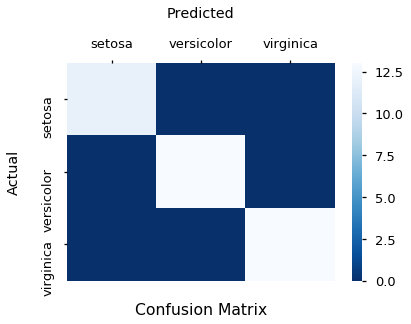

In [30]:
confusion_matrix.visualize(y_test, y_pred)

In [31]:
metrics.accuracy_score(y_test, y_pred)    # Test Set Score

1.0

In [32]:
metrics.accuracy_score(y_train, logreg.predict(X_train))    # Training Set Score - if 1 then Model is Overfit

0.9642857142857143